In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.graphics.api as smg

# Load the diabetes dataset (Note: standardized)
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'] + ['target'])
print("Note: bmi = body mass index, bp = average_blood_pressure, s1 = total serum cholesterol, s2 = low-density lipoproteins, s3 = high-density lipoproteins, s4 = total cholesterol, s5 = log of serum triglycerides level, s6 = disease_progression, target = quantitative measure of disease progression one year after baseline")
df.head()

Note: bmi = body mass index, bp = average_blood_pressure, s1 = total serum cholesterol, s2 = low-density lipoproteins, s3 = high-density lipoproteins, s4 = total cholesterol, s5 = log of serum triglycerides level, s6 = disease_progression, target = quantitative measure of disease progression one year after baseline


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


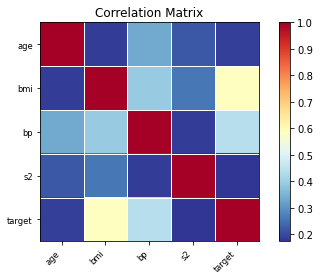

In [2]:
# correlation analysis
corr_matrix = np.corrcoef(df[['age','bmi','bp','s2', 'target']],rowvar=False)
ax=smg.plot_corr(np.abs(corr_matrix), xnames=['age','bmi','bp','s2','target'])

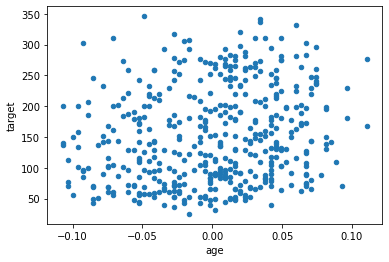

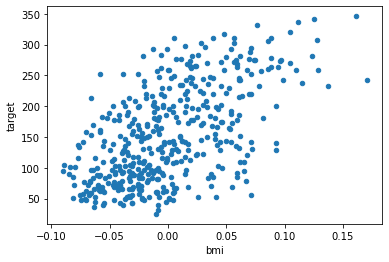

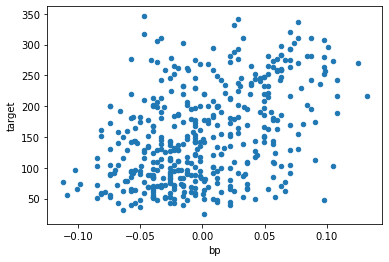

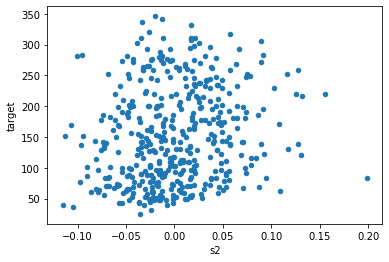

In [19]:
# scatter plot
ax1=df.plot.scatter('age', 'target')
ax2=df.plot.scatter('bmi', 'target')
ax3=df.plot.scatter('bp', 'target')
ax4=df.plot.scatter('s2', 'target')

In [89]:
# LASSO for variable selection
import statsmodels.api as sm_api
model = sm_api.OLS.from_formula("target ~ age + bmi + bp + s2", data=df)
LASSO_result = model.fit_regularized(alpha=0.0, L1_wt=1) # alpha is weight of regularization term
print(LASSO_result.params)

# adjusted R2
row, col = df.shape
est_value=np.ndarray(row)
for i in range(row-1):
    est_value[i]=LASSO_result.params[0]+LASSO_result.params[2]*df['bmi'].values[i]+LASSO_result.params[3]*df['bp'].values[i]+LASSO_result.params[4]*df['s2'].values[i]
SSE=((df['target'] - est_value) ** 2).sum();
SST=((df['target'] - df['target'].mean()) ** 2).sum();
p=3;
rsquared_adj=1-((SSE*(row-1))/(SST*(row-p-1)))
print("adjusted R2 = %f" %(rsquared_adj))

Intercept    152.133484
age           26.548531
bmi          789.501172
bp           394.285231
s2            -3.392651
dtype: float64
adjusted R2 = 0.390393


In [90]:
# Ridge for multicolinearity problem
import statsmodels.api as sm_api
model = sm_api.OLS.from_formula("target ~ age + bmi + bp  + s2", data=df)
Ridge_result = model.fit_regularized(alpha=0.01, L1_wt=0)
print(Ridge_result.params)

# adjusted R2
row, col = df.shape
est_value=np.ndarray(row)
for i in range(row-1):
    est_value[i]=Ridge_result.params[0]+Ridge_result.params[1]*df['age'].values[i]+Ridge_result.params[2]*df['bmi'].values[i]+Ridge_result.params[3]*df['bp'].values[i]+Ridge_result.params[4]*df['s2'].values[i]
SSE=((df['target'] - est_value) ** 2).sum();
SST=((df['target'] - df['target'].mean()) ** 2).sum();
p=4;
rsquared_adj=1-((SSE*(row-1))/(SST*(row-p-1)))
print("adjusted R2 = %f" %(rsquared_adj))

[150.62721204  41.80456498 163.42614816 116.04487022  38.45095993]
adjusted R2 = 0.165777


In [91]:
# ELASTIC NET (LASSO + Ridge)
import statsmodels.api as sm_api
model = sm_api.OLS.from_formula("target ~ age + bmi + bp + s2", data=df)
ELASTIC_result = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(ELASTIC_result.params)

# adjusted R2
row, col = df.shape
est_value=np.ndarray(row)
for i in range(row-1):
    est_value[i]=ELASTIC_result.params[0]+ELASTIC_result.params[1]*df['age'].values[i]+ELASTIC_result.params[2]*df['bmi'].values[i]+ELASTIC_result.params[3]*df['bp'].values[i]+ELASTIC_result.params[4]*df['s2'].values[i]
SSE=((df['target'] - est_value) ** 2).sum();
SST=((df['target'] - df['target'].mean()) ** 2).sum();
p=4;
rsquared_adj=1-((SSE*(row-1))/(SST*(row-p-1)))
print("adjusted R2 = %f" %(rsquared_adj))

Intercept    151.371626
age           56.416799
bmi          265.441425
bp           180.418965
s2            51.215618
dtype: float64
adjusted R2 = 0.242723
